In [6]:
# Arima 
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [7]:
# Descargar los datos
df = yf.download('NQ=F', start='2020-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
# Convertir el indice a columna
df.reset_index(inplace=True)

In [9]:
# Guardar las fechas en una columna separada
dates = df['Date']

In [10]:
# Seleccionar la columna de precios de cierre y numerar el indice de 0 a x
close_prices = df['Close']
close_prices.index = range(len(close_prices))

In [11]:
# Ajustar el modelo ARIMA
model = ARIMA(close_prices, order=(5,1,2))
model_fit = model.fit()

/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [12]:
# Mostrar el resumen del modelo 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   NQ=F   No. Observations:                 1007
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -6748.534
Date:                Tue, 07 Jan 2025   AIC                          13513.067
Time:                        13:06:45   BIC                          13552.377
Sample:                             0   HQIC                         13528.003
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2139      0.562     -0.381      0.703      -1.315       0.887
ar.L2          0.6043      0.547      1.104      0.270      -0.468       1.677
ar.L3          0.0197      0.045      0.435      0.6

In [15]:
# Obtener predicciones dentro de la muestra
in_sample_preds = model_fit.predict(start=0, end=len(close_prices) - 1)


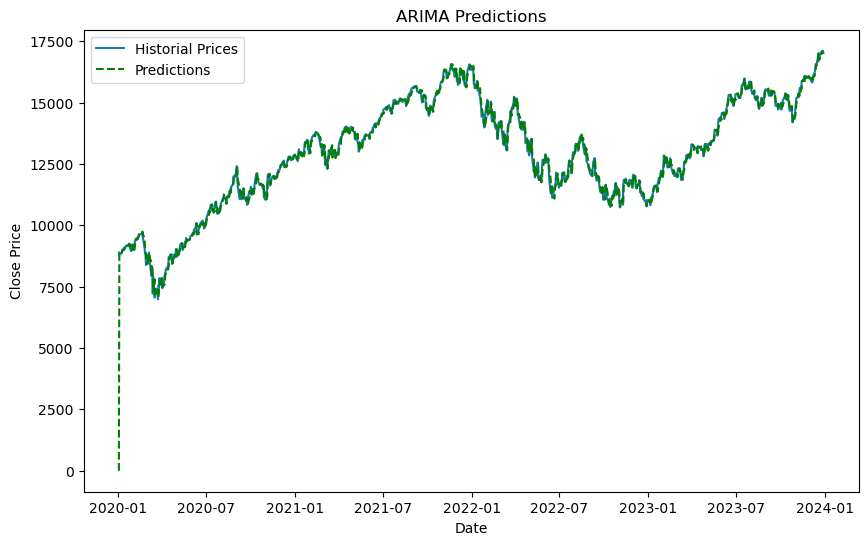

In [18]:
plt.figure(figsize=(10,6))

# Graficar los precios reales y las predicciones dentro de la muestra
plt.plot(dates, close_prices, label='Historial Prices')
plt.plot(dates, in_sample_preds, label='Predictions', linestyle='--', color='green')

plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()